# 기상데이터 분석
* 평균 기온이 상승했을까?
* 가장 더웠던 / 추웠던 날?
* 일교차가 가장 큰 달?
* 우리나라에서 가장 추운 / 더운 지역은?

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumSquareRound'

In [101]:
temps = pd.read_csv("./cctemp.csv")

In [102]:
temps.shape

(20283, 5)

In [103]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283 entries, 0 to 20282
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      20283 non-null  object 
 1   지점      20283 non-null  int64  
 2   평균기온    20282 non-null  float64
 3   최저기온    20282 non-null  float64
 4   최고기온    20282 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 792.4+ KB


In [104]:
temps.describe()

,지점,평균기온,최저기온,최고기온
count,20283.0,20282.000000,20282.000000,20282.000000
mean,101.0,11.108495,5.956188,17.141781
std,0.0,10.785860,11.317933,10.813429
min,101.0,-20.300000,-27.900000,-13.400000
25%,101.0,1.900000,-3.000000,7.400000
50%,101.0,12.300000,6.200000,19.100000
75%,101.0,20.800000,16.000000,26.600000
max,101.0,32.800000,27.600000,39.500000


In [105]:
temps.drop("지점", axis=1, inplace=True)

In [106]:
temps["날짜"] = pd.to_datetime(temps["날짜"])
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283 entries, 0 to 20282
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      20283 non-null  datetime64[ns]
 1   평균기온    20282 non-null  float64       
 2   최저기온    20282 non-null  float64       
 3   최고기온    20282 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 634.0 KB


In [107]:
temps["날짜"].dt.year

0        2066
1        2066
2        2066
3        2066
4        2066
         ... 
20278    2021
20279    2021
20280    2021
20281    2021
20282    2021
Name: 날짜, Length: 20283, dtype: int64

In [108]:
temps.loc[temps["날짜"].dt.year > 2021, "날짜"] = temps.loc[temps["날짜"].dt.year > 2021, "날짜"] + pd.DateOffset(years=-100)

In [109]:
temps["날짜"]

0       1966-01-01
1       1966-01-02
2       1966-01-03
3       1966-01-04
4       1966-01-05
           ...    
20278   2021-07-09
20279   2021-07-10
20280   2021-07-11
20281   2021-07-12
20282   2021-07-13
Name: 날짜, Length: 20283, dtype: datetime64[ns]

In [110]:
temps["연도"] = temps["날짜"].dt.year

In [111]:
decTemp = temps.loc[(temps["날짜"].dt.month == 12) & (temps["날짜"].dt.day == 1), ("평균기온", "연도")].reset_index()

In [112]:
octTemp = temps.loc[(temps["날짜"].dt.month == 8) & (temps["날짜"].dt.day == 1), ("평균기온", "연도")].reset_index()

In [113]:
decTemp

,index,평균기온,연도
0,334,-8.5,1966
1,699,-2.8,1967
2,1065,10.3,1968
3,1430,0.1,1969
4,1795,-2.7,1970
5,2160,0.4,1971
6,2526,-5.3,1972
7,2891,-1.3,1973
8,3256,3.6,1974
9,3621,-0.2,1975


<AxesSubplot:xlabel='연도', ylabel='평균기온'>

/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/codespace/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


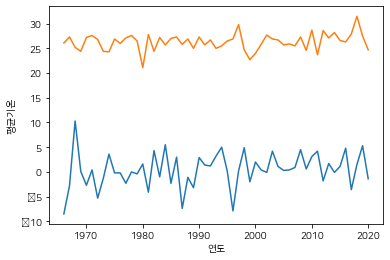

In [114]:
sns.lineplot(x=decTemp["연도"], y=decTemp["평균기온"])
sns.lineplot(x=octTemp["연도"], y=octTemp["평균기온"])

In [117]:
tempSorted = temps.sort_values(by="최고기온", ascending=False)
tempSorted.head(10)

,날짜,평균기온,최저기온,최고기온,연도
19205,2018-08-01,31.5,24.4,39.5,2018
19207,2018-08-03,32.8,27.6,38.5,2018
19206,2018-08-02,32.2,26.7,38.4,2018
19197,2018-07-24,31.0,25.5,37.2,2018
19204,2018-07-31,29.8,24.0,37.1,2018
19219,2018-08-15,28.8,25.7,37.1,2018
19195,2018-07-22,29.1,22.1,37.0,2018
17018,2012-08-05,29.7,24.1,36.8,2012
2393,1972-07-21,28.5,21.5,36.6,1972
19200,2018-07-27,30.7,26.0,36.6,2018


In [120]:
tempSorted = temps.sort_values(by="최저기온", ascending=True)
tempSorted.head(10)

,날짜,평균기온,최저기온,최고기온,연도
1132,1969-02-06,-16.2,-27.9,-7.0,1969
7309,1986-01-05,-20.3,-25.6,-13.4,1986
380,1967-01-16,-17.3,-25.0,-10.5,1967
7310,1986-01-06,-15.5,-24.8,-4.9,1986
1131,1969-02-05,-17.0,-24.8,-8.2,1969
12798,2001-01-15,-18.4,-24.5,-10.4,2001
12799,2001-01-16,-17.6,-24.3,-8.3,2001
5483,1981-01-05,-18.4,-23.8,-6.8,1981
1830,1971-01-05,-16.6,-23.4,-8.9,1971
367,1967-01-03,-14.6,-23.4,-7.1,1967


In [125]:
temps["일교차"] = temps.최고기온 - temps.최저기온

In [126]:
temps["월"] = temps["날짜"].dt.month

In [130]:
pd.DataFrame(temps.groupby('월')['일교차'].mean().sort_values())

,일교차
월,
7,8.107800
8,8.713196
12,10.023988
9,10.489333
11,10.741394
6,10.979643
1,11.303917
2,11.812966
3,12.406394
